In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetesdata1/health care diabetes.csv


In [2]:
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/diabetesdata1/health care diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check for missing values 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.shape

(768, 9)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

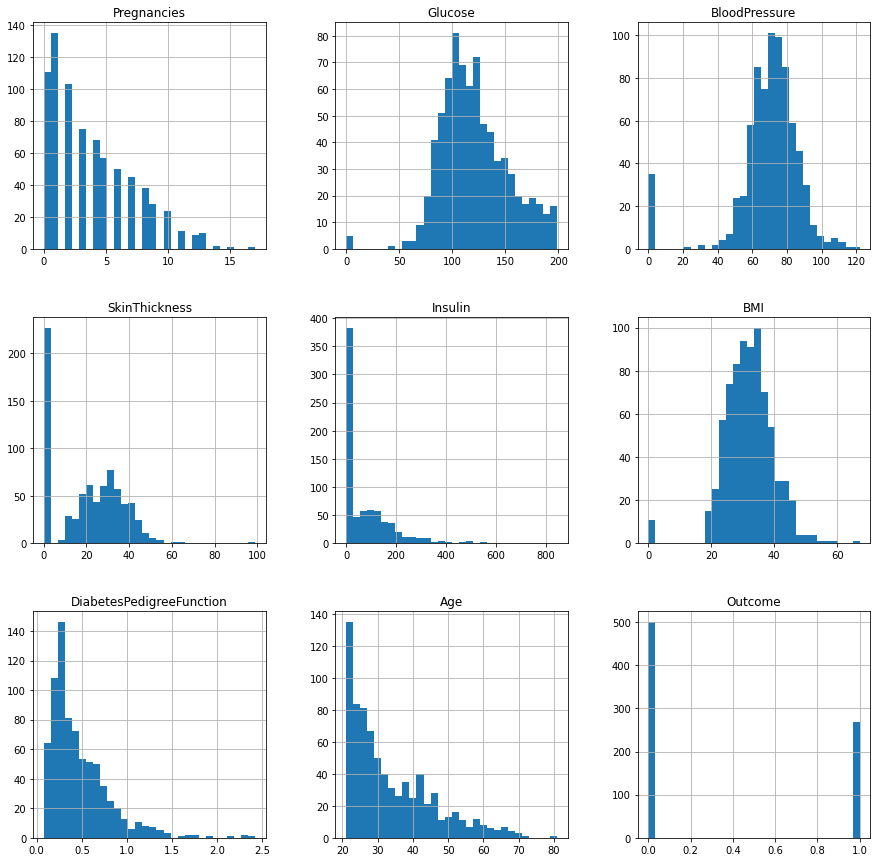

In [12]:
data.hist(bins=30, figsize=(15,15))

In [13]:
# As it is mentioned that all the values as zeros are missing values 
data[data[["Pregnancies","Glucose","BloodPressure", "SkinThickness","Insulin","BMI"]]==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# percent of values which are missing in data
(data[data[["Pregnancies","Glucose","BloodPressure", "SkinThickness","Insulin","BMI"]]==0].count()/len(data))*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [15]:
#counting the median value of any one of the column incuding zeros in the data
data.SkinThickness.median()

23.0

In [16]:
#checking the median value of the column excluding zeros which are null values in the data. 
data[data['SkinThickness']!=0]['SkinThickness'].median()

29.0

In [17]:
#To replace the missing values with the median we need to exclude all the values as 'Zeroes' while calculating 

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    
    print(i,"old median:",data[i].median())
    
    median_value=data[data[i]!=0][i].median()
    
    print(median_value,'\n')
    
    data[i].replace(0,median_value,inplace=True)

Glucose old median: 117.0
117.0 

BloodPressure old median: 72.0
72.0 

SkinThickness old median: 23.0
29.0 

Insulin old median: 30.5
125.0 

BMI old median: 32.0
32.3 



<AxesSubplot:>

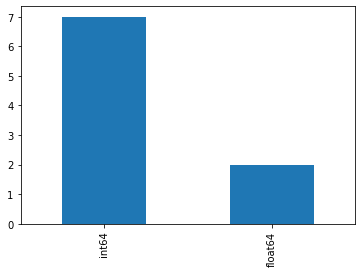

In [18]:
data.dtypes.value_counts().plot(kind = 'bar')

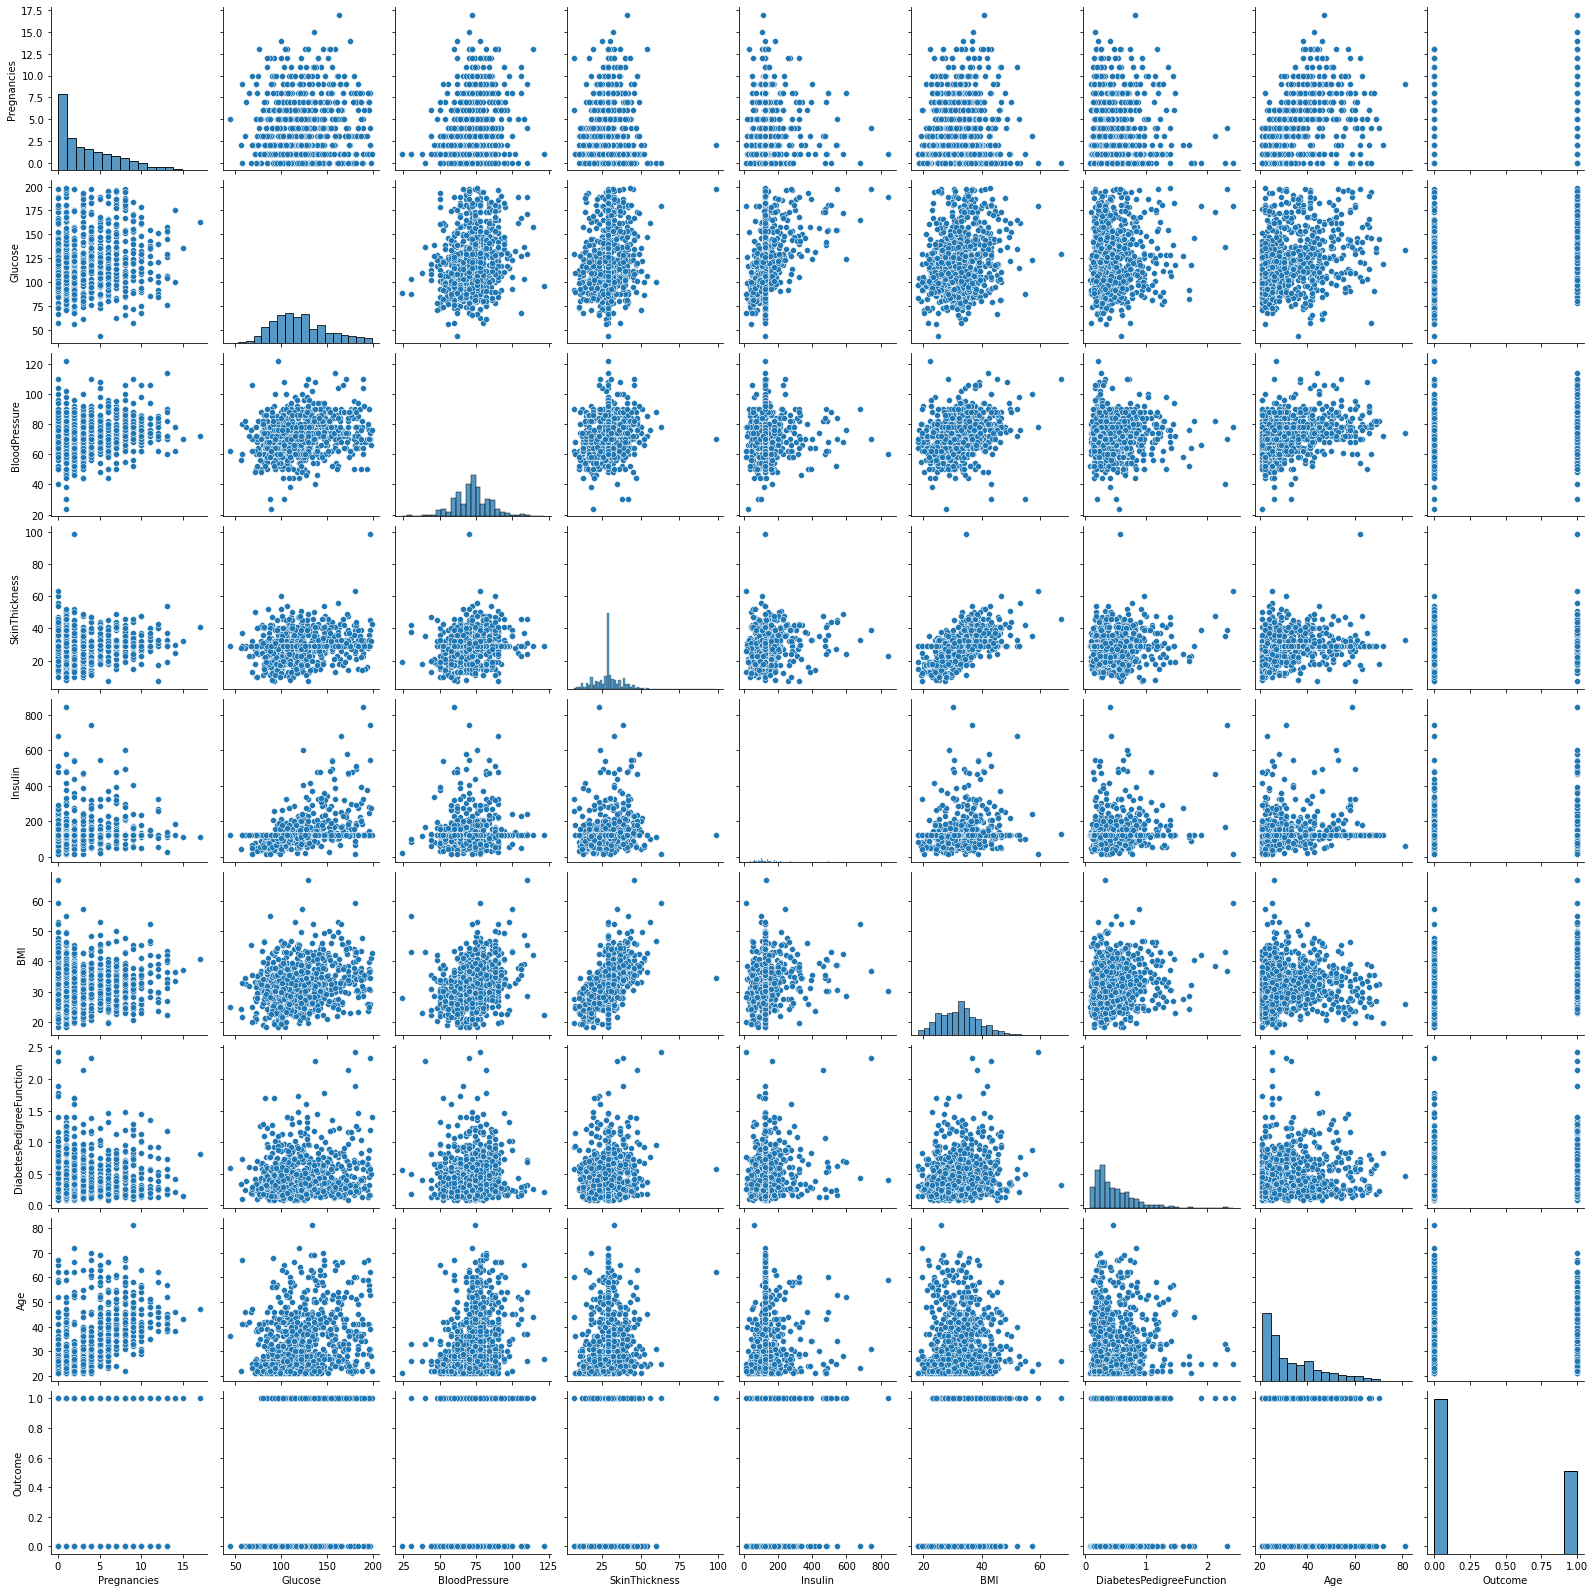

In [19]:
sns.pairplot(data)

There is clear positive linear relation between BMI and SkinThickness. Visually with pairplot not clear to name out  realtionships between other independent variables. We will get better picture with coreatlion heat map. 


In [20]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

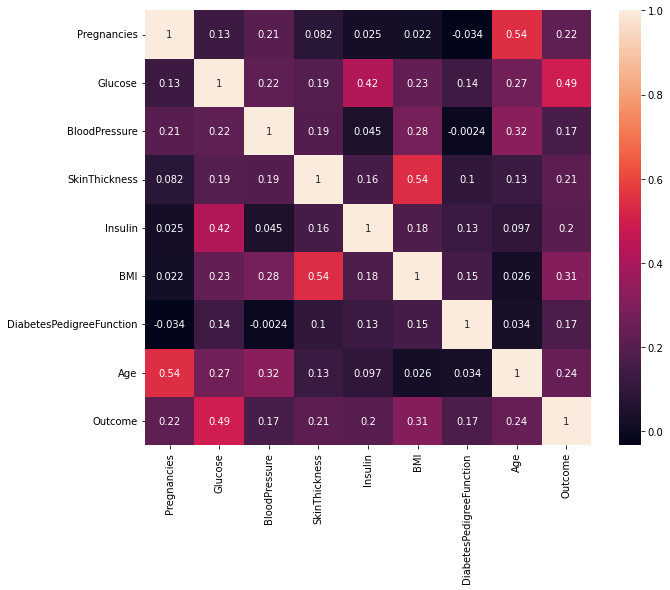

In [21]:
# Heatmap of the correlation 

plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True)

Again with heatmap we see a 0.54 correalation between BMI abd SkinThickness. 
Obvious correaltion between Insulin & Glucose. Important factor effecting Outcome variable is Glucose. 

In [22]:
# Checking output class variable count. If it could require undersampling or oversamling if the ratio between output variables is
# significantly lower or higher

data.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

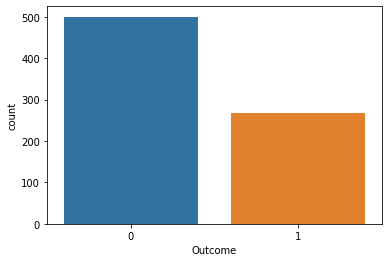

In [23]:
sns.countplot(data.Outcome)

Output class variable count is not drastically different.

In [24]:
# X is the feature data and y is the target data

X = data.drop('Outcome', axis=1)
y = data["Outcome"]

In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [26]:
# To create a K-Nearest Neighbors (KNN) model we will first have to scale the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.fit_transform(X_test)

In [28]:
#Initializing K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [29]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(weights='distance')

In [30]:
y_pred = knn.predict(scaled_X_test)
accuracy = knn.score(scaled_X_test, y_test)
print('Accuracy of KNN: {:.2f}%'.format(accuracy * 100))

Accuracy of KNN: 75.97%


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [32]:
print(confusion_matrix(y_test, y_pred))

[[84 16]
 [21 33]]


<AxesSubplot:>

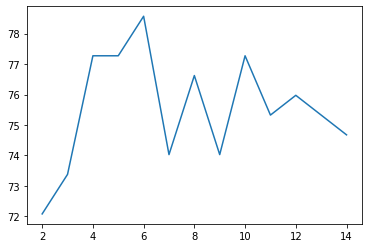

In [33]:
acc=[]

ran=range(2,15)

for k in ran:
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    model.fit(scaled_X_train,y_train)
    
    test_acc=model.score(scaled_X_test,y_test)
    
    acc.append(test_acc*100)
    
    
sns.lineplot(ran,acc)

We get better score with with value of 10 which is 76%

In [34]:
from sklearn.metrics import roc_curve
def plot_roc_curve(true_y,y_prob):
    fpr, tpr, thresholds = roc_curve(true_y,y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

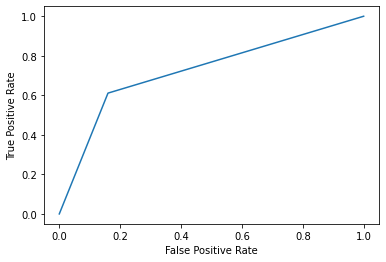

In [35]:
plot_roc_curve(y_test,y_pred)

In [36]:
#Initializing Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=600,max_depth=3)

In [37]:
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=600)

In [38]:
accuracy = rf_model.score(scaled_X_test, y_test)
print('Accuracy of random forest: {:.2f}%'.format(accuracy * 100))

Accuracy of random forest: 72.08%


In [39]:
rf_y_pred = rf_model.predict(scaled_X_test)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



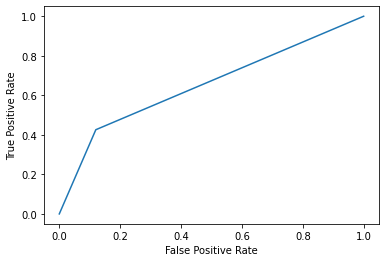

In [40]:
plot_roc_curve(y_test,rf_y_pred)

In [41]:
#from sklearn.ensemble import BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
#bagging = BaggingClassifier(base_estimator=knn, n_estimators=10, max_samples=0.8, bootstrap=True, n_jobs=-1, random_state=42)
#bagging.fit(scaled_X_train,y_train)


In [65]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV, KFold
# Define the parameter grid for the KNN model
param_grid = {'n_neighbors': np.arange(1, 50),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


In [66]:
# Define the scoring metric as recall
recall = make_scorer(recall_score,pos_label=1)

In [67]:
# Create an instance of the GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,  n_jobs=-1,scoring=recall)

In [68]:
grid_search.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=48),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=1))

In [69]:
# Print the best parameters and the best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best score: 0.62


In [70]:
knn = KNeighborsClassifier(n_neighbors=17,weights='distance',metric='euclidean')

In [71]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17, weights='distance')

In [72]:
y_pred_new = knn.predict(scaled_X_test)

In [73]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

